Run a BlueCellLab simulation using handcrafted Sonata files.

In [ ]:
!nrnivmodl components/mechanisms

**Note**: The compiled mechanisms need to be provided before importing bluecellulab.

In [2]:
import json
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("white")

from bluecellulab import CircuitSimulation
from bluepysnap import Simulation as snap_sim

In [3]:
simulation_config = Path("components") / "simulation_config.json"

In [4]:
with open(simulation_config) as f:
    simulation_config_dict = json.load(f)

Here is all simulation config entries.

In [5]:
print(json.dumps(simulation_config_dict, indent=4))

{
    "manifest": {
        "$OUTPUT_DIR": "."
    },
    "run": {
        "tstart": 0.0,
        "tstop": 50.0,
        "dt": 0.025,
        "random_seed": 1
    },
    "conditions": {
        "v_init": -65
    },
    "target_simulator": "NEURON",
    "network": "circuit_config.json",
    "node_set": "Node0",
    "output": {
        "output_dir": "$OUTPUT_DIR/output_sonata_ornstein",
        "spikes_file": "out.h5",
        "spikes_sort_order": "by_time"
    },
    "inputs": {
        "ornstein_uhlenbeck": {
            "module": "ornstein_uhlenbeck",
            "input_type": "conductance",
            "delay": 0.0,
            "duration": 500.0,
            "reversal": 0,
            "tau": 2.8,
            "sigma": 0.1542,
            "mean": 0.199,
            "node_set": "Node0",
            "random_seed": 42
        }
    },
    "reports": {
        "soma": {
            "cells": "Node0",
            "variable_name": "v",
            "type": "compartment",
            "dt": 1.0,

In [6]:
t_stop = simulation_config_dict["run"]['tstop']
t_start = simulation_config_dict["run"]['tstart']
dt = simulation_config_dict["run"]['dt']

In [7]:
sim = CircuitSimulation(simulation_config)

In [8]:
# Get the cell
snap_access = snap_sim(simulation_config)
population_name = snap_access.circuit.nodes.population_names[0]
cell = next(snap_access.circuit.nodes.get(population_name))

In [9]:
# Run the simulation
cell_id = (population_name, 0)
sim.instantiate_gids(cell_id, add_stimuli=True)
sim.run(t_stop=t_stop, forward_skip=True, forward_skip_value=t_start)

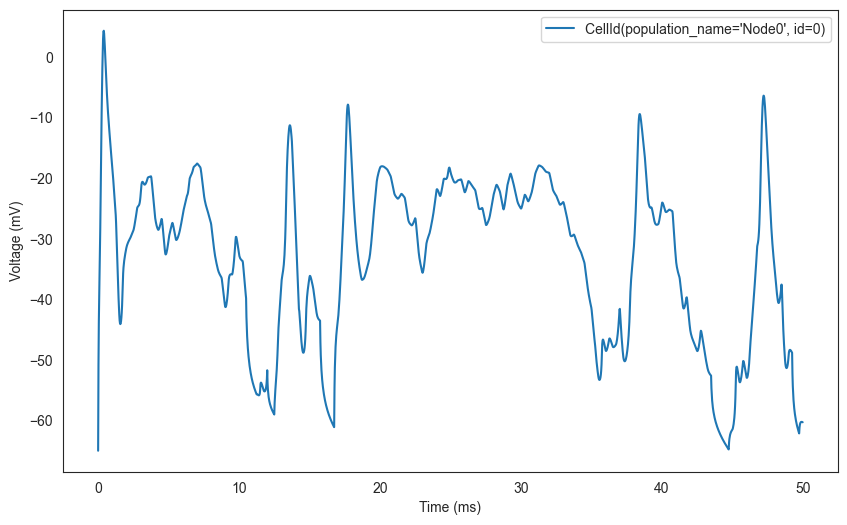

In [10]:
# Plot results
plt.figure(figsize=(10, 6))
for cell_id in sim.cells:
    # Get the voltage trace
    time = sim.get_time_trace()
    voltage = sim.get_voltage_trace(cell_id)
    plt.plot(time, voltage, label=str(cell_id))
    plt.legend()
    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (mV)")
